# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Parsing Energy Consumption Data - SOLAR
- Creating necessary variables concerning energy consumption in Spanish communities

In [2]:
data_energia = pd.read_excel('Consumo demanda.xlsx', header=1)

data_energia['SOLAR TOT'] = data_energia['Solar Fotovoltaico 2017'] + data_energia['Solar térmica 2017'] 

data_energia = data_energia.drop([i for i in data_energia.columns if '2016' in i ], axis=1).drop(['Solar Fotovoltaico 2017', 'Solar térmica 2017'], axis=1)

data_energia['% SOLAR'] =data_energia['SOLAR TOT']/data_energia['Generación neta\xa02017'] * 100
data_energia['DIFF'] = data_energia['Demanda B.C 2017'] - data_energia['Generación neta\xa02017']



# Assigning each Province to a Comunidades
- To assign a consumption value to each municipaity (distribution of consumption for community)

In [3]:
#data_muni = pd.read_csv("BD_Municipios_Entidades/MUNICIPIOS.csv", sep=';', decimal=',',encoding='latin-1')
data_muni = pd.read_excel('data_muni.xls').drop(['Unnamed: 0'], axis=1)

for k in range(len(data_muni)):
    print(k)
    i = data_muni.loc[k]['PROVINCIA']
    print(i)
    
    if i in ['Araba/alava', 'Gipuzkoa', 'Bizkaia']:
        data_muni.loc[k, 'COMUNIDAD'] = 'País Vasco'

    elif i in ['Albacete', 'Ciudad Real','Guadalajara', 'Toledo', 'Cuenca' ]:
        data_muni.loc[k,'COMUNIDAD'] = 'Castilla la Mancha'

    elif i in ['Barcelona', 'Tarragona', 'Lleida', 'Girona']:
        data_muni.loc[k,'COMUNIDAD']='Cataluña'

    elif i in ['Zaragoza', 'Huesca', 'Teruel']:
        data_muni.loc[k, 'COMUNIDAD'] = 'Aragón'

    elif i in ['Alicante','Castellon', 'Valencia' ]:
        data_muni.loc[k, 'COMUNIDAD'] = 'Comunidad Valenciana'

    elif i in ['Malaga', 'Almeria', 'Sevilla', 'Cadiz', 'Cordoba', 'Jaen','Granada', 'Huelva']:
        data_muni.loc[k,'COMUNIDAD'] = 'Andalucía'

    elif i in ['Caceres', 'Badajoz']:
        data_muni.loc[k,'COMUNIDAD'] = 'Extremadura'

    elif i in ['Avila', 'Burgos', 'Leon', 'Palencia', 'Zamora', 'Segovia', 'Soria', 'Salamanca', 'Valladolid']:
        data_muni.loc[k,'COMUNIDAD'] = 'Castilla y León'

    elif i in ['Madrid']:
        data_muni.loc[k,'COMUNIDAD'] = 'Madrid'

    elif i in ['Cantabria']:
        data_muni.loc[k, 'COMUNIDAD'] = 'Cantabria'
        
    elif i in ['Ceuta']:
        data_muni.loc[k,'COMUNIDAD'] = 'Ceuta'
    
    elif i in ['Melilla']:
        data_muni.loc[k,'COMUNIDAD'] = 'Melilla'

    elif i in ['La Rioja']:
        data_muni.loc[k,'COMUNIDAD'] = 'La Rioja'

    elif i in ['Murcia']:
        data_muni.loc[k,'COMUNIDAD'] = 'Murcia'

    elif i in ['A Coruña','Lugo', 'Pontevedra', 'Ourense']:
        data_muni.loc[k,'COMUNIDAD'] = 'Galicia'

    elif i in ['Navarra']:
        data_muni.loc[k,'COMUNIDAD'] = 'Navarra'

    elif i in ['Las Palmas', 'Tenerife']:
        data_muni.loc[k,'COMUNIDAD'] = 'Canarias'

    elif i in ['Asturias']:
        data_muni.loc[k, 'COMUNIDAD'] = 'Asturias'

    elif i in ['Baleares']:
        data_muni.loc[k,'COMUNIDAD'] = 'Baleares'

0
Araba/alava
1
Araba/alava
2
Araba/alava
3
Araba/alava
4
Araba/alava
5
Araba/alava
6
Araba/alava
7
Araba/alava
8
Araba/alava
9
Araba/alava
10
Araba/alava
11
Araba/alava
12
Araba/alava
13
Araba/alava
14
Araba/alava
15
Araba/alava
16
Araba/alava
17
Araba/alava
18
Araba/alava
19
Araba/alava
20
Araba/alava
21
Araba/alava
22
Araba/alava
23
Araba/alava
24
Araba/alava
25
Araba/alava
26
Araba/alava
27
Araba/alava
28
Araba/alava
29
Araba/alava
30
Araba/alava
31
Araba/alava
32
Araba/alava
33
Araba/alava
34
Araba/alava
35
Araba/alava
36
Araba/alava
37
Araba/alava
38
Araba/alava
39
Araba/alava
40
Araba/alava
41
Araba/alava
42
Araba/alava
43
Araba/alava
44
Araba/alava
45
Araba/alava
46
Araba/alava
47
Araba/alava
48
Araba/alava
49
Araba/alava
50
Araba/alava
51
Albacete
52
Albacete
53
Albacete
54
Albacete
55
Albacete
56
Albacete
57
Albacete
58
Albacete
59
Albacete
60
Albacete
61
Albacete
62
Albacete
63
Albacete
64
Albacete
65
Albacete
66
Albacete
67
Albacete
68
Albacete
69
Albacete
70
Albacete
71
Al

Badajoz
700
Badajoz
701
Badajoz
702
Badajoz
703
Badajoz
704
Badajoz
705
Badajoz
706
Badajoz
707
Badajoz
708
Badajoz
709
Badajoz
710
Badajoz
711
Badajoz
712
Badajoz
713
Badajoz
714
Badajoz
715
Badajoz
716
Badajoz
717
Badajoz
718
Badajoz
719
Badajoz
720
Badajoz
721
Badajoz
722
Badajoz
723
Badajoz
724
Badajoz
725
Badajoz
726
Badajoz
727
Badajoz
728
Badajoz
729
Badajoz
730
Badajoz
731
Badajoz
732
Badajoz
733
Badajoz
734
Badajoz
735
Badajoz
736
Badajoz
737
Badajoz
738
Badajoz
739
Badajoz
740
Badajoz
741
Badajoz
742
Badajoz
743
Badajoz
744
Badajoz
745
Badajoz
746
Badajoz
747
Badajoz
748
Badajoz
749
Badajoz
750
Badajoz
751
Badajoz
752
Badajoz
753
Badajoz
754
Badajoz
755
Badajoz
756
Badajoz
757
Badajoz
758
Badajoz
759
Badajoz
760
Badajoz
761
Badajoz
762
Badajoz
763
Badajoz
764
Badajoz
765
Badajoz
766
Badajoz
767
Badajoz
768
Badajoz
769
Badajoz
770
Badajoz
771
Badajoz
772
Badajoz
773
Badajoz
774
Badajoz
775
Badajoz
776
Badajoz
777
Badajoz
778
Badajoz
779
Badajoz
780
Badajoz
781
Badajoz
782
Bada

1345
Burgos
1346
Burgos
1347
Burgos
1348
Burgos
1349
Burgos
1350
Burgos
1351
Burgos
1352
Burgos
1353
Burgos
1354
Burgos
1355
Burgos
1356
Burgos
1357
Burgos
1358
Burgos
1359
Burgos
1360
Burgos
1361
Burgos
1362
Burgos
1363
Burgos
1364
Burgos
1365
Burgos
1366
Burgos
1367
Burgos
1368
Burgos
1369
Burgos
1370
Burgos
1371
Burgos
1372
Burgos
1373
Burgos
1374
Burgos
1375
Burgos
1376
Burgos
1377
Burgos
1378
Burgos
1379
Burgos
1380
Burgos
1381
Burgos
1382
Burgos
1383
Burgos
1384
Burgos
1385
Burgos
1386
Burgos
1387
Burgos
1388
Burgos
1389
Burgos
1390
Burgos
1391
Burgos
1392
Burgos
1393
Burgos
1394
Burgos
1395
Burgos
1396
Burgos
1397
Burgos
1398
Burgos
1399
Burgos
1400
Burgos
1401
Burgos
1402
Burgos
1403
Burgos
1404
Burgos
1405
Burgos
1406
Burgos
1407
Burgos
1408
Burgos
1409
Burgos
1410
Burgos
1411
Burgos
1412
Burgos
1413
Burgos
1414
Burgos
1415
Burgos
1416
Burgos
1417
Burgos
1418
Burgos
1419
Burgos
1420
Burgos
1421
Burgos
1422
Burgos
1423
Burgos
1424
Burgos
1425
Burgos
1426
Burgos
1427
Burgos
1428

2007
Ciudad Real
2008
Ciudad Real
2009
Ciudad Real
2010
Ciudad Real
2011
Ciudad Real
2012
Ciudad Real
2013
Ciudad Real
2014
Ciudad Real
2015
Ciudad Real
2016
Ciudad Real
2017
Ciudad Real
2018
Ciudad Real
2019
Ciudad Real
2020
Ciudad Real
2021
Ciudad Real
2022
Ciudad Real
2023
Ciudad Real
2024
Ciudad Real
2025
Ciudad Real
2026
Ciudad Real
2027
Ciudad Real
2028
Ciudad Real
2029
Ciudad Real
2030
Ciudad Real
2031
Ciudad Real
2032
Ciudad Real
2033
Ciudad Real
2034
Ciudad Real
2035
Ciudad Real
2036
Ciudad Real
2037
Ciudad Real
2038
Ciudad Real
2039
Ciudad Real
2040
Ciudad Real
2041
Ciudad Real
2042
Ciudad Real
2043
Ciudad Real
2044
Ciudad Real
2045
Ciudad Real
2046
Ciudad Real
2047
Ciudad Real
2048
Ciudad Real
2049
Cordoba
2050
Cordoba
2051
Cordoba
2052
Cordoba
2053
Cordoba
2054
Cordoba
2055
Cordoba
2056
Cordoba
2057
Cordoba
2058
Cordoba
2059
Cordoba
2060
Cordoba
2061
Cordoba
2062
Cordoba
2063
Cordoba
2064
Cordoba
2065
Cordoba
2066
Cordoba
2067
Cordoba
2068
Cordoba
2069
Cordoba
2070
Cordoba


2651
Girona
2652
Girona
2653
Girona
2654
Girona
2655
Girona
2656
Girona
2657
Girona
2658
Girona
2659
Girona
2660
Girona
2661
Girona
2662
Girona
2663
Girona
2664
Girona
2665
Girona
2666
Girona
2667
Girona
2668
Girona
2669
Girona
2670
Girona
2671
Girona
2672
Girona
2673
Girona
2674
Girona
2675
Girona
2676
Girona
2677
Girona
2678
Granada
2679
Granada
2680
Granada
2681
Granada
2682
Granada
2683
Granada
2684
Granada
2685
Granada
2686
Granada
2687
Granada
2688
Granada
2689
Granada
2690
Granada
2691
Granada
2692
Granada
2693
Granada
2694
Granada
2695
Granada
2696
Granada
2697
Granada
2698
Granada
2699
Granada
2700
Granada
2701
Granada
2702
Granada
2703
Granada
2704
Granada
2705
Granada
2706
Granada
2707
Granada
2708
Granada
2709
Granada
2710
Granada
2711
Granada
2712
Granada
2713
Granada
2714
Granada
2715
Granada
2716
Granada
2717
Granada
2718
Granada
2719
Granada
2720
Granada
2721
Granada
2722
Granada
2723
Granada
2724
Granada
2725
Granada
2726
Granada
2727
Granada
2728
Granada
2729
Granada


3218
Gipuzkoa
3219
Gipuzkoa
3220
Gipuzkoa
3221
Gipuzkoa
3222
Gipuzkoa
3223
Gipuzkoa
3224
Gipuzkoa
3225
Gipuzkoa
3226
Gipuzkoa
3227
Gipuzkoa
3228
Huelva
3229
Huelva
3230
Huelva
3231
Huelva
3232
Huelva
3233
Huelva
3234
Huelva
3235
Huelva
3236
Huelva
3237
Huelva
3238
Huelva
3239
Huelva
3240
Huelva
3241
Huelva
3242
Huelva
3243
Huelva
3244
Huelva
3245
Huelva
3246
Huelva
3247
Huelva
3248
Huelva
3249
Huelva
3250
Huelva
3251
Huelva
3252
Huelva
3253
Huelva
3254
Huelva
3255
Huelva
3256
Huelva
3257
Huelva
3258
Huelva
3259
Huelva
3260
Huelva
3261
Huelva
3262
Huelva
3263
Huelva
3264
Huelva
3265
Huelva
3266
Huelva
3267
Huelva
3268
Huelva
3269
Huelva
3270
Huelva
3271
Huelva
3272
Huelva
3273
Huelva
3274
Huelva
3275
Huelva
3276
Huelva
3277
Huelva
3278
Huelva
3279
Huelva
3280
Huelva
3281
Huelva
3282
Huelva
3283
Huelva
3284
Huelva
3285
Huelva
3286
Huelva
3287
Huelva
3288
Huelva
3289
Huelva
3290
Huelva
3291
Huelva
3292
Huelva
3293
Huelva
3294
Huelva
3295
Huelva
3296
Huelva
3297
Huelva
3298
Huelva
3299
Hue

3995
Lleida
3996
Lleida
3997
Lleida
3998
Lleida
3999
Lleida
4000
Lleida
4001
Lleida
4002
Lleida
4003
Lleida
4004
Lleida
4005
Lleida
4006
Lleida
4007
Lleida
4008
Lleida
4009
Lleida
4010
Lleida
4011
Lleida
4012
Lleida
4013
Lleida
4014
Lleida
4015
Lleida
4016
Lleida
4017
Lleida
4018
Lleida
4019
Lleida
4020
Lleida
4021
Lleida
4022
Lleida
4023
Lleida
4024
Lleida
4025
Lleida
4026
Lleida
4027
Lleida
4028
Lleida
4029
Lleida
4030
Lleida
4031
Lleida
4032
Lleida
4033
Lleida
4034
Lleida
4035
Lleida
4036
Lleida
4037
Lleida
4038
Lleida
4039
Lleida
4040
Lleida
4041
Lleida
4042
Lleida
4043
Lleida
4044
Lleida
4045
Lleida
4046
Lleida
4047
Lleida
4048
Lleida
4049
La Rioja
4050
La Rioja
4051
La Rioja
4052
La Rioja
4053
La Rioja
4054
La Rioja
4055
La Rioja
4056
La Rioja
4057
La Rioja
4058
La Rioja
4059
La Rioja
4060
La Rioja
4061
La Rioja
4062
La Rioja
4063
La Rioja
4064
La Rioja
4065
La Rioja
4066
La Rioja
4067
La Rioja
4068
La Rioja
4069
La Rioja
4070
La Rioja
4071
La Rioja
4072
La Rioja
4073
La Rioja
40

4678
Navarra
4679
Navarra
4680
Navarra
4681
Navarra
4682
Navarra
4683
Navarra
4684
Navarra
4685
Navarra
4686
Navarra
4687
Navarra
4688
Navarra
4689
Navarra
4690
Navarra
4691
Navarra
4692
Navarra
4693
Navarra
4694
Navarra
4695
Navarra
4696
Navarra
4697
Navarra
4698
Navarra
4699
Navarra
4700
Navarra
4701
Navarra
4702
Navarra
4703
Navarra
4704
Navarra
4705
Navarra
4706
Navarra
4707
Navarra
4708
Navarra
4709
Navarra
4710
Navarra
4711
Navarra
4712
Navarra
4713
Navarra
4714
Navarra
4715
Navarra
4716
Navarra
4717
Navarra
4718
Navarra
4719
Navarra
4720
Navarra
4721
Navarra
4722
Navarra
4723
Navarra
4724
Navarra
4725
Navarra
4726
Navarra
4727
Navarra
4728
Navarra
4729
Navarra
4730
Navarra
4731
Navarra
4732
Navarra
4733
Navarra
4734
Navarra
4735
Navarra
4736
Navarra
4737
Navarra
4738
Navarra
4739
Navarra
4740
Navarra
4741
Navarra
4742
Navarra
4743
Navarra
4744
Navarra
4745
Navarra
4746
Navarra
4747
Navarra
4748
Navarra
4749
Navarra
4750
Navarra
4751
Navarra
4752
Navarra
4753
Navarra
4754
Navarra

5294
Pontevedra
5295
Pontevedra
5296
Pontevedra
5297
Pontevedra
5298
Pontevedra
5299
Pontevedra
5300
Pontevedra
5301
Pontevedra
5302
Pontevedra
5303
Pontevedra
5304
Pontevedra
5305
Pontevedra
5306
Pontevedra
5307
Pontevedra
5308
Pontevedra
5309
Pontevedra
5310
Pontevedra
5311
Pontevedra
5312
Pontevedra
5313
Pontevedra
5314
Pontevedra
5315
Pontevedra
5316
Pontevedra
5317
Pontevedra
5318
Pontevedra
5319
Pontevedra
5320
Pontevedra
5321
Pontevedra
5322
Pontevedra
5323
Pontevedra
5324
Pontevedra
5325
Pontevedra
5326
Pontevedra
5327
Pontevedra
5328
Pontevedra
5329
Pontevedra
5330
Pontevedra
5331
Pontevedra
5332
Pontevedra
5333
Pontevedra
5334
Pontevedra
5335
Pontevedra
5336
Pontevedra
5337
Pontevedra
5338
Pontevedra
5339
Pontevedra
5340
Pontevedra
5341
Pontevedra
5342
Pontevedra
5343
Pontevedra
5344
Pontevedra
5345
Salamanca
5346
Salamanca
5347
Salamanca
5348
Salamanca
5349
Salamanca
5350
Salamanca
5351
Salamanca
5352
Salamanca
5353
Salamanca
5354
Salamanca
5355
Salamanca
5356
Salamanca
5357

Segovia
5868
Segovia
5869
Segovia
5870
Segovia
5871
Segovia
5872
Segovia
5873
Segovia
5874
Segovia
5875
Segovia
5876
Segovia
5877
Segovia
5878
Segovia
5879
Segovia
5880
Segovia
5881
Segovia
5882
Segovia
5883
Segovia
5884
Segovia
5885
Segovia
5886
Segovia
5887
Segovia
5888
Segovia
5889
Segovia
5890
Segovia
5891
Segovia
5892
Segovia
5893
Segovia
5894
Segovia
5895
Segovia
5896
Segovia
5897
Segovia
5898
Segovia
5899
Segovia
5900
Segovia
5901
Segovia
5902
Segovia
5903
Segovia
5904
Segovia
5905
Segovia
5906
Segovia
5907
Segovia
5908
Segovia
5909
Segovia
5910
Segovia
5911
Segovia
5912
Segovia
5913
Segovia
5914
Segovia
5915
Segovia
5916
Segovia
5917
Segovia
5918
Segovia
5919
Segovia
5920
Segovia
5921
Segovia
5922
Segovia
5923
Segovia
5924
Segovia
5925
Segovia
5926
Segovia
5927
Segovia
5928
Segovia
5929
Segovia
5930
Segovia
5931
Segovia
5932
Segovia
5933
Segovia
5934
Segovia
5935
Segovia
5936
Segovia
5937
Segovia
5938
Segovia
5939
Segovia
5940
Segovia
5941
Segovia
5942
Segovia
5943
Segovia
5944

6506
Tarragona
6507
Tarragona
6508
Tarragona
6509
Tarragona
6510
Tarragona
6511
Tarragona
6512
Tarragona
6513
Tarragona
6514
Tarragona
6515
Tarragona
6516
Tarragona
6517
Tarragona
6518
Tarragona
6519
Tarragona
6520
Tarragona
6521
Tarragona
6522
Tarragona
6523
Tarragona
6524
Tarragona
6525
Tarragona
6526
Tarragona
6527
Tarragona
6528
Tarragona
6529
Tarragona
6530
Tarragona
6531
Tarragona
6532
Tarragona
6533
Tarragona
6534
Tarragona
6535
Tarragona
6536
Tarragona
6537
Tarragona
6538
Tarragona
6539
Tarragona
6540
Tarragona
6541
Tarragona
6542
Tarragona
6543
Tarragona
6544
Tarragona
6545
Teruel
6546
Teruel
6547
Teruel
6548
Teruel
6549
Teruel
6550
Teruel
6551
Teruel
6552
Teruel
6553
Teruel
6554
Teruel
6555
Teruel
6556
Teruel
6557
Teruel
6558
Teruel
6559
Teruel
6560
Teruel
6561
Teruel
6562
Teruel
6563
Teruel
6564
Teruel
6565
Teruel
6566
Teruel
6567
Teruel
6568
Teruel
6569
Teruel
6570
Teruel
6571
Teruel
6572
Teruel
6573
Teruel
6574
Teruel
6575
Teruel
6576
Teruel
6577
Teruel
6578
Teruel
6579
Te

7166
Valencia
7167
Valencia
7168
Valencia
7169
Valencia
7170
Valencia
7171
Valencia
7172
Valencia
7173
Valencia
7174
Valencia
7175
Valencia
7176
Valencia
7177
Valencia
7178
Valencia
7179
Valencia
7180
Valencia
7181
Valencia
7182
Valencia
7183
Valencia
7184
Valencia
7185
Valencia
7186
Valencia
7187
Valencia
7188
Valencia
7189
Valencia
7190
Valencia
7191
Valencia
7192
Valencia
7193
Valencia
7194
Valencia
7195
Valencia
7196
Valencia
7197
Valencia
7198
Valencia
7199
Valencia
7200
Valencia
7201
Valencia
7202
Valencia
7203
Valencia
7204
Valencia
7205
Valencia
7206
Valencia
7207
Valencia
7208
Valencia
7209
Valencia
7210
Valencia
7211
Valencia
7212
Valencia
7213
Valencia
7214
Valencia
7215
Valencia
7216
Valencia
7217
Valencia
7218
Valencia
7219
Valencia
7220
Valencia
7221
Valencia
7222
Valencia
7223
Valencia
7224
Valencia
7225
Valencia
7226
Valencia
7227
Valencia
7228
Valencia
7229
Valencia
7230
Valencia
7231
Valencia
7232
Valencia
7233
Valencia
7234
Valencia
7235
Valencia
7236
Valencia
7237
V

7760
Zamora
7761
Zamora
7762
Zamora
7763
Zamora
7764
Zamora
7765
Zamora
7766
Zamora
7767
Zamora
7768
Zamora
7769
Zamora
7770
Zamora
7771
Zamora
7772
Zamora
7773
Zamora
7774
Zamora
7775
Zamora
7776
Zamora
7777
Zamora
7778
Zamora
7779
Zamora
7780
Zamora
7781
Zamora
7782
Zamora
7783
Zamora
7784
Zamora
7785
Zamora
7786
Zamora
7787
Zamora
7788
Zamora
7789
Zamora
7790
Zamora
7791
Zamora
7792
Zamora
7793
Zamora
7794
Zamora
7795
Zamora
7796
Zamora
7797
Zamora
7798
Zamora
7799
Zamora
7800
Zamora
7801
Zamora
7802
Zamora
7803
Zamora
7804
Zamora
7805
Zamora
7806
Zamora
7807
Zamora
7808
Zamora
7809
Zamora
7810
Zamora
7811
Zamora
7812
Zamora
7813
Zamora
7814
Zamora
7815
Zamora
7816
Zamora
7817
Zamora
7818
Zamora
7819
Zamora
7820
Zamora
7821
Zamora
7822
Zamora
7823
Zamora
7824
Zamora
7825
Zamora
7826
Zamora
7827
Zamora
7828
Zamora
7829
Zamora
7830
Zamora
7831
Zamora
7832
Zamora
7833
Zamora
7834
Zamora
7835
Zamora
7836
Zaragoza
7837
Zaragoza
7838
Zaragoza
7839
Zaragoza
7840
Zaragoza
7841
Zaragoza
7842

In [4]:
data_muni['UNIQUE'] = data_muni['NOMBRE_ACTUAL'] +  data_muni['PROVINCIA']

## Summing Population for each community 
- In order to properly distribute the consumo data
- Putting together data for each community to later distribute among the municipalities

In [5]:
data_compile = pd.DataFrame(columns = ['Comunidad', 'POP. TOT.']) 

g=0
for i in data_muni['COMUNIDAD'].unique():
    data_compile.loc[g] = [i, data_muni[data_muni['COMUNIDAD']==i]['POBLACION_MUNI'].sum(axis=0)]
    g+=1

In [6]:
mini_data = data_energia[['Comunidad', 'Demanda B.C 2017', '% SOLAR', 'DIFF']]

In [7]:
consume= data_compile.merge(mini_data, on ='Comunidad')
consume

,Comunidad,POP. TOT.,Demanda B.C 2017,% SOLAR,DIFF
0,País Vasco,2207776,1.654322e+07,0.541071,1.077041e+07
1,Castilla la Mancha,2032863,1.171294e+07,11.588406,-9.728276e+06
2,Comunidad Valenciana,5003769,2.702326e+07,3.752840,9.915979e+06
3,Andalucía,8414240,4.027229e+07,10.517968,3.196224e+06
4,Castilla y León,2399548,1.411017e+07,3.530397,-1.125001e+07
5,Extremadura,1067710,5.067544e+06,14.987989,-1.611780e+07
6,Baleares,1149460,6.028273e+06,2.540847,1.179299e+06
7,Cataluña,7675217,4.765229e+07,1.131922,2.800709e+06
8,Galicia,2699499,1.985824e+07,0.078855,-6.510399e+06
9,Aragón,1319291,1.061157e+07,1.875477,-5.988431e+06


## Perform calculation for distributing consumption data
- Assign these values to the overall dataframe

In [8]:
for j in range(len(data_muni)):
    a = data_muni.iloc[j]['COMUNIDAD']
    b = consume[consume['Comunidad']==a]['POP. TOT.']
    c = consume[consume['Comunidad']==a]['Demanda B.C 2017']
    calc = data_muni.iloc[j]['POBLACION_MUNI']/b*c
    
    calc_2= data_muni.iloc[j]['POBLACION_MUNI']/b*consume[consume['Comunidad']==a]['% SOLAR']
    calc_3= data_muni.iloc[j]['POBLACION_MUNI']/b*consume[consume['Comunidad']==a]['DIFF']
    print(calc.values[0])
    data_muni.loc[j, 'CALC Consumo'] = calc.values[0]
    data_muni.loc[j, 'CALC % SOLAR'] = calc_2.values[0]
    data_muni.loc[j, 'CALC DIFF'] = calc_3.values[0]   

21550.325644169545
77554.19694615951
10992.464436716524
13645.042767048937
1700.9471214278465
7343.2959427281485
12093.958828125746
22284.65523844236
2180.509305442746
6616.459507580566
3394.4010837304604
3701.6206078650052
7792.885490242116
13090.548991781709
1348.7686425419047
2817.4278310875343
4488.402316014449
7530.624920858968
2495.221988702524
3873.9632677453596
10880.067049838031
1176.4259826615503
11194.779733097808
5177.772955535868
6481.582643326375
1521.111302422259
135641.16648496423
5440.033524919016
1655.9881666764497
1498.6318250465608
8901.87304077657
25371.83679803827
1955.714531685762
5882.129913307751
10115.764819064285
1168.9328235363173
37930.371491928454
2367.838283573566
5357.608774541455
10273.121160694174
7463.186488731873
1655.9881666764497
2217.97510106891
14124.604951063835
1886582.6455963638
2008.1666455623915
1371.2481199176032
3072.1952413454496
17249.252306285915
25559.165776169095
6556.5142345787035
4551.817712260984
2990.3713831182918
998686.091453777

588.0344964968402
411.6241475477882
246.9744885286729
229.33345363376768
3445.882149471484
917.3338145350707
376.34207775797773
205.8120737738941
441.02587237263015
952.6158843248812
158.76931405414686
2922.531447589296
458.66690726753535
934.974849429976
2428.58247053195
740.9234655860188
1540.6503808217215
470.4275971974722
2987.2152422039485
2969.5742073090432
1705.3000398408367
1722.941074735742
12531.015120347665
370.4617327930094
194.0513838439573
2252.172121582898
164.64965901911526
299.8975932133885
223.4531086687993
2810.8048932548963
4868.925630993837
617.4362213216823
352.82069789810413
8320.68812543029
3492.9249091912316
582.1541515318718
1199.590372853554
435.1455274076618
141.12827915924166
176.41034894905206
1834.6676290701414
682.1200159363347
658.598636076461
558.6327716719983
346.9403529331357
364.58138782804093
4122.12182044285
2275.693501442772
717.4020857261451
599.795186426777
558.6327716719983
5827.421860283687
417.5044925127566
305.7779381783569
2205.12936186315

13286.387475429032
3284.345315187831
90186.01143368325
103242.68099481748
19352.18213126743
28851.328316971365
32862.078928713025
583.6076741543594
113971.12845161252
28783.033801910748
4749.573092851968
9983.41638340649
1049.2520950221995
150167.22143373927
987.1661722398208
22642.736038733496
76924.45832736716
4668.861393234875
416000.51701105
422.18427492017486
14230.093501721189
2706.94623331171
937.4974340139178
12802.117277726478
8673.403412698299
3843.1186202292392
15291.762781299863
9530.189147095125
11696.987852200138
45968.417228073165
56212.59448716564
27727.573114610313
2123.33855915735
1924.6636062537384
92023.75474804164
550031.607113649
95171.51103310825
34029.29427702175
138147.38678307075
289817.0875481436
1576.9824386724179
2520.6884649645735
260.76087568599036
2918.038370771797
9008.667395723143
14074.878694765242
9021.08458027962
8238.80195322165
124743.03605435521
1067.877871856913
102528.69288282013
290382.06944546325
1086.5036486916267
46769.32563196584
29962.666

341.0600079681673
905.573124605134
1052.581748729344
205.8120737738941
5980.310829372866
311.6582831433253
1975.7959082293833
441.02587237263015
441.02587237263015
294.0172482484201
4263.250099602092
147.00862412421006
470.4275971974722
311.6582831433253
1711.180384805805
2552.069714796287
688.0003609013031
505.7096669872826
2846.086963044707
523.3507018821878
1029.0603688694705
1411.2827915924165
3104.8221415033167
993.7782990796601
299.8975932133885
623.3165662866506
664.4789810414294
558.6327716719983
205.8120737738941
1005.5389890095968
1687.6590049459317
323.4189730732621
6838.841194258252
952.6158843248812
2975.4545522740113
646.8379461465242
1358.359686907701
158.76931405414686
887.9320897102288
270.4958683885465
1546.5307257866898
658.598636076461
9749.611951917612
446.9062173375986
658.598636076461
317.5386281082937
2175.727637038309
476.3079421624406
4780.7204565193115
617.4362213216823
476.3079421624406
1293.6758922930485
599.795186426777
676.2396709713663
388.1027676879146


60421.0726486191
2177.7240221104
58152.410700310684
6638.46861245522
33163.62582242409
21145.460944359886
13176.426885428422
6891.1419519953115
685.8738463192825
6702.121600647477
36075.884200100845
56193.05016497744
1026.1104787453833
4676.903550492116
1420.3529258422936
141873.27514021692
1371.747692638565
32392.687639551623
19053.251415861643
810.0872200621446
1004.5081528770594
637.2686131155538
10514.932116406637
858.6924532658733
1701.183162130504
874.8941976671161
30486.282381672045
2052.2209574907665
820.8883829963065
766.8825683254969
5767.8210068424705
145340.4484420829
98247.3780491369
5578.800655494636
28947.11666355397
187308.3670227691
15974.919979625494
10531.13386080788
3639.9919088125703
91.80988494037639
988.3064084758165
4952.333205313244
927431.0541788798
577.8622169776633
3893.8192377653754
3585.9860941417605
3105.3343435715547
2111.6273536286567
1085.5168748832739
1717.3849065317465
2829.9046887504255
9845.260014488598
2673.2878262050776
3785.8076084237564
14468.1

604.9884301106371
218.9481937543258
1071.6937904817
1400.1160811131886
1382.830697395742
2684.996270776732
841.2220075824097
1486.5429997004223
760.556883567658
4257.966189064388
2529.4278173197113
4672.815398283111
2857.8501079512
403.32562007375805
610.7502246831193
4909.048975754883
6735.53785523176
167.09204260198547
674.1299649804241
4741.956933152898
2535.1896118921936
17769.374461535284
829.6984184374451
916.125337024679
161.33024802950322
126.75948059460968
772.0804727126225
1273.356600518579
161.33024802950322
315112.5451690547
167.09204260198547
328.4222906314887
1826.4888794768756
230.4717828992903
276.5661394791484
893.07815873475
6942.962459841121
1578.7317128601387
628.035608400566
2621.6165304794276
362.9930580663822
1054.4084067642532
339.94587977645324
881.5545695897854
524.3233060958854
2080.007840666095
800.8894455750338
3825.831596128219
1083.2173796266643
4442.343615383821
812.4130347199983
9022.970300507215
1457.7340268380112
351.46946892141773
20125.948441680528


1416.7171660322604
1383.213719538254
2723.3515792985004
6954.358250827278
24548.45386682251
2953.0894981145425
5920.537616155088
19369.778280177557
1675.1723247003076
2651.558479668487
928.5240885481705
1191.765453858219
6308.220354157159
9907.44774894182
38299.22554929104
15899.778464726922
3221.117070066592
9720.785689903785
6265.14449437915
8945.420213899642
4767.061815432876
19762.247224821633
35556.729143424534
26635.239962734897
6016.261748995105
72750.34095841338
7653.144420559406
2005.4205829983684
3374.27568261062
12573.364848536308
3656.6618744886714
9830.868442669807
2977.0205313245465
1579.44819186029
33575.239593636164
3785.8894538226955
1431.0757859582627
4680.91009587686
2656.344686310488
4393.737697356807
21088.026464655875
5145.172140150945
1115.186147586205
27736.067490395097
3508.2894685866445
1823.544730602335
1112611.1684128083
9261.309852271701
88171.4987589402
24854.771091910567
13497.10273044248
12420.20623599228
1928.8412767263544
5666.8686641290415
34714.35677

11621.88980323608
12685.918399019136
15390.94884322818
87167.9201038332
111917.82469447715
104005.04865823132
1071.5217549082909
1805.8513491811057
8062.639218750497
4518.374952515381
3896.442745121058
11449.547143355723
1940.7282134352963
27807.113513738936
22494.463693948877
40905.15566464588
206226.72544465723
1873.2897813082009
87018.05692132856
8512.228766264465
30459.69184407135
4578.320225517243
126094.88175941762
959.1243680297989
3656.6616531136083
21138.20189228174
152515.7608349885
2270.4272149455396
31463.77516685254
17324.183897538245
3731.5932443659367
467580.6225736522
13877.330699931152
4930.498704403185
1880.7829404334336
43025.71969708676
2787.4551945866033
62725.2350373238
10617.806480454885
45873.12016467522
4518.374952515381
164856.9939142469
39961.01761486654
1865.7966221829683
7140.980646346862
85272.15084514931
906.6722541531693
45123.804252151946
9561.271043797056
77127.08687602126
121059.47882726118
29095.936883278977
4383.49808826119
295762.48383206397
1753.3

6523.599653047198
12645.157948166323
20657.267866875794
14148.0268337546
10950.840796898012
1099.6245084490913
1699.4196948758683
3804.5831923345563
3375.3180098918633
2116.924187388625
3292.9931803823056
4798.361491414216
63901.70873431164
1705.3000398408367
60791.00624784335
1117.2655433439966
1846.4283190000783
51188.40292004994
14436.246888997428
3116.5828314332534
3304.753870312242
1134.9065782389016
2116.924187388625
2728.4800637453386
10772.791975822114
1852.3086639650467
1734.7017646656789
4204.446649952408
1811.146249210268
6850.601884188189
7973.747772497153
2428.58247053195
4463.181828411018
30095.605530708286
1311.3169271879538
699.7610508312399
1228.9920976783962
24085.892976510575
1611.2145204013423
2069.8814276688777
20140.18150501678
13101.408581949601
2652.0355792007495
3304.753870312242
405.74380258281974
699.7610508312399
929.0945044650075
5668.652546229539
4498.463898200828
9573.20160296856
676.2396709713663
2428.58247053195
864.4107098503551
2652.0355792007495
2722

3141.5476927883606
6897.74602112227
577.3990818761215
1390.3844563412647
5961.881987891338
2488.6258751633536
357.06371252343763
18643.05383872373
13103.15623836009
3478.666168978339
14937.165307230474
2732.0784064293334
535.5955687851565
51265.69302836508
194.76202501278416
2342.5543564037653
2688.7979564264924
1244.3129375816768
156.89163126029834
2266.813568898793
80474.58672403234
2737.488462679689
4219.84387527699
24410.173801602283
1163.16209382635
2607.647112671166
1303.823556335583
492.31511878231555
8542.478819310727
849.3788313057531
800.6883250525572
200.1720812631393
119.02123750781256
541.0056250355116
238.04247501562512
1044.1408563185375
4030.4919065145614
97.38101250639208
131031.56238360092
816.9184938036225
492.31511878231555
216.40225001420464
551.8257375362218
735.7676500482958
5940.2417628899175
2245.1733438973733
292.1430375191763
59.51061875390628
11231.27677573722
12410.669038314636
135.2514062588779
962.9900125632107
827.7386063043327
1406.6146250923302
843.968

2177.7240221104
4451.172177060817
8615.171955601583
40414.728885055425
8026.468538635475
3426.9239556726293
7969.034058931465
3498.717055302643
1210.9102804262225
125681.00021230109
16857.0197931271
11975.0890182862
31182.13627263573
106000.11850039347
16158.23362339497
6293.861734231156
18771.502449927448
14842.026796844726
6676.7582655912265
7605.282354139397
17460.081830019208
2905.2274316945336
326830.906755672
1210.9102804262225
14401.695785780646
384375.4692124486
12424.992442634284
7543.061667793387
1962.3447232203607
10816.827010921988
15727.47502561489
3651.875667846671
7030.9375570992925
4154.427365256764
1780.468870824327
2527.1171069764646
1110.399940944204
2297.379188160422
2750412.791652373
74320.21673698965
686275.025569938
396020.30997243675
6083.268641983117
24644.177999662526
12415.420029350282
4613.903202888848
100945.88428644056
17718.536988687258
1201.3378671422206
14588.35784481868
44157.54247910011
1440.6481992422646
225808.44316295948
13037.626892810396
162142.3

10181.076419251347
12858.758367667164
3957.6727699112894
46160.58853381662
13381.05347299003
6333.747685675874
8650.972448728024
5995.35930757937
15205.40820707553
3759.0535045068195
5097.894478714728
4553.530566124699
9313.036666742924
11652.330237062237
36957.89590340952
3906.1788862879084
11152.103939006534
31734.944850180862
10247.282841052836
8010.977037980288
39760.63442633926
15720.347043309343
8871.660521399657
8547.98468148126
10512.108528258796
2324.5810321412037
17324.01370472321
9460.162048524011
6539.723220169399
6936.961750978338
100950.08070909411
21230.192591011117
13638.522891106933
13167.72166940745
9614.643699394155
6032.140653024642
13579.672738394498
3817.9036572192554
17051.91925953513
109813.11838679996
6839.392372908205
808952.155066126
15406.740156218333
17393.37152626126
15572.292770388576
20280.19523585489
10698.837690752018
20145.683736841565
127754.88294750017
63768.79757070086
4935.5373099503995
106957.33579236326
15592.986847159858
231525.33091708622
3520

787.9662253057659
411.6241475477882
493.9489770573458
1775.8641794204575
1587.6931405414687
787.9662253057659
323.4189730732621
1346.5989969777643
341.0600079681673
746.8038105509871
2116.924187388625
1299.5562372580168
452.786562302567
364.58138782804093
1640.6162452261842
25067.9105856603
2175.727637038309
6838.841194258252
3445.882149471484
505.7096669872826
893.8124346751972
4133.882510372787
934.974849429976
1534.7700358567529
5168.823224207226
505.7096669872826
1499.4879660669426
5603.968751614888
5004.173565188111
1117.2655433439966
41844.53477071515
658.598636076461
7091.696027751894
1228.9920976783962
382.22242272294613
405.74380258281974
1046.7014037643755
15741.683471220413
1305.4365822229854
258.7351784586097
1828.7872841051733
376.34207775797773
458.66690726753535
858.5303648853868
2393.30040074214
2910.770757659359
152.88896908917846
1593.573485506437
72586.97824756996
640.9576011815558
1070.2227836242494
693.8807058662715
923.2141595000392
2587.351784586097
482.188287127

31002.469038580017
3788.8565459370343
14215.729619775659
8870.735563900198
7870.898419833482
66019.32179845047
2909.300562058794
387109.87892159057
466.0894957303494
1059.977724160956
7021.4127260023615
16403.343220703588
7119.141168655498
2533.4219364698024
7434.879214150252
20507.937812135377
5532.933368669955
5735.907826488011
12118.326888989084
29311.015223429556
7540.125229315169
2127.473020833692
20477.867522088258
4986.532530293205
229.33345363376768
740.9234655860188
3369.4376649268947
147.00862412421006
129.36758922930485
423.38483747772494
370.4617327930094
258.7351784586097
688.0003609013031
1658.2572801210895
329.2993180382305
311.6582831433253
152.88896908917846
323.4189730732621
758.5645004809239
452.786562302567
176.41034894905206
976.1372641847548
117.60689929936805
1287.7955473280801
7032.892578102209
929.0945044650075
899.6927796401656
652.7182911114927
141.12827915924166
2799.0442033249597
4392.617688831397
4251.489409672155
564.5131166369666
488.0686320923774
1040.8

294.0172482484201
4521.985278060702
299.8975932133885
335.1796630031989
917.3338145350707
21498.54119192448
441.02587237263015
123.48724426433645
82.32482950955763
723.2824306911134
329.2993180382305
2875.488687869549
858.5303648853868
52.92310468471562
2663.796269130686
246.9744885286729
464.54725223250375
82.32482950955763
611.5558763567138
876.1713997802918
188.17103887898887
52.92310468471562
723.2824306911134
235.2137985987361
1558.2914157166267
840.8893299904815
17670.436619730048
299.8975932133885
12019.425108395415
3645.81387828041
358.70104286307253
1564.171760681595
570.3934616019351
729.1627756560819
188.17103887898887
231673.83092982514
1117.2655433439966
147.00862412421006
158.76931405414686
376.34207775797773
617.4362213216823
2534.4286799013817
294.0172482484201
635.0772562165874
346.9403529331357
147.00862412421006
382.22242272294613
252.8548334936413
294.0172482484201
564.5131166369666
1123.1458883089647
223.4531086687993
105.84620936943124
887.9320897102288
623.316566

257.3884054502727
241.3016301096307
1656.937860086131
1246.7250888997587
3482.7868612490033
997.380071119807
723.9048903288922
225.2148547689887
965.2065204385228
1214.5515382184747
675.644564306966
876.7292560649917
1447.8097806577844
1496.0701066797105
329.778894483162
3659.7413899960657
579.1239122631137
828.4689300430655
538.9069739115085
3498.8736365896457
23953.208482216007
176.9545287470625
1343.245740943611
4922.553254236466
273.4751807909148
707.81811498825
2276.27871070085
19505.215100528483
2654.317931205938
378.0392205050881
152.82436573609945
2396.929525755665
715.8615026585711
313.6921191425199
1319.115577932648
442.3863218676563
1367.375903954574
6941.443559487044
1383.462679295216
4061.910773512117
2646.274543535617
2018.890305250577
957.1631327682019
587.1672999334347
265.4317931205938
13044.702912099832
20874.98173610322
3935.305693005382
3952.5910767228293
1578.7317128601387
9495.437455450761
4667.053603710629
939.172515314608
2996.133177690774
2460.286282449924
1803

46607.01806090872
105284.33570074341
3618.3895829442463
48286.5988971709
7263.782073223898
12610.357725634052
2495.0686377914058
13290.830990486254
11632.852480092399
109383.37703425786
120238.5457830906
9499.622800595416
39100.20982166618
6145.861709538137
6988.352418402767
853.2918717987923
357194.458232735
2289.846542042329
2721.893059408806
55804.2082993476
880.2947791341971
2100.8261906944954
183.61976988075278
6135.060546603975
16871.416503160934
6232.271013011433
101374.31471857679
17978.53570391253
6075.654150466085
26252.226511480567
1992.814561352876
148402.57813391782
5919.037287920737
49253.3029797784
92895.40181525967
3434.769813063493
1501.361647848508
2446.463404587677
2219.638982970276
788.4848941938208
443971.0012457919
3440.170394530574
6820.934392923258
6027.048917262357
35892.264430220086
62274.104896910605
4289617.052324805
16412.36707845905
750.680823924254
847.8912903317115
6518.501830766724
23060.48286443572
52477.45011562573
38068.69876145372
19193.666534005748

1099.6245084490913
6156.721178321917
5651.011511334635
605.6755313917454
1840.5479740351097
670.3593260063979
1881.7103887898888
499.82932202231416
917.3338145350707
629.1969112516191
1940.5138384395727
2975.4545522740113
7091.696027751894
2934.2921375192327
2146.325912213467
2740.2407536752753
1952.2745283695097
4445.540793516113
811.4876051656395
2216.890051793088
982.0176091497232
893.8124346751972
623.3165662866506
4022.155956038387
8673.508823328393
2199.2490168981826
294.0172482484201
1681.778659980963
5903.866344828276
664.4789810414294
2881.3690328345174
546.8720817420614
1276.0348573981435
1628.8555552962475
717.4020857261451
1922.8728035446675
1340.7186520127957
1858.189008930015
934.974849429976
441.02587237263015
1264.2741674682065
593.9148414618087
1805.2659042452997
905.573124605134
1099.6245084490913
2693.1979939555285
1975.7959082293833
858.5303648853868
723.2824306911134
2810.8048932548963
3722.258362824999
2140.4455672484987
740.9234655860188
723.2824306911134
993.778

1399.5494546358582
442.3863218676563
474.5598725489404
257.3884054502727
2010.846917580256
11630.7385712842
1600.6341463938838
1471.9399436687472
691.731339647608
981.293295779165
5115.594558324171
402.1693835160512
3362.136046194188
313.6921191425199
2163.671283316355
150338.95894597025
265.4317931205938
530.8635862411876
941.0763574275597
1126.0742738449433
490.6466478895825
1729.32834911902
699.7747273179291
2718.665032568506
619.3408506147188
579.1239122631137
739.9916656695342
1335.20235327329
6700.141929377412
772.1652163508184
2517.5803408104803
37964.78980391523
434.3429341973353
3563.2207379522138
852.5990930540286
2203.8882216679604
3587.3509009631766
595.2106876037558
394.1259958457302
3498.8736365896457
5429262.547303679
68891.61539629957
1238.6817012294375
691.731339647608
21878.014463273183
202865.0
210596.0


In [9]:
data_muni['UNIQUE']=data_muni['NOMBRE_ACTUAL'] + data_muni['PROVINCIA']
data_muni['Dens.Pob'] = data_muni['POBLACION_MUNI']/data_muni['SUPERFICIE']

In [10]:
save=[]
save_index = []
for _prov in data_muni['PROVINCIA'].unique():
    work = data_muni[data_muni['PROVINCIA']==_prov]
    save.append(np.ones(len(work))*work['CALC Consumo'].sum())
    save_index.append(work.index.values)
 
save = np.hstack((save))
save_index = np.hstack((save_index))

data_muni.loc[save_index, 'CONS'] = save
    

# Adding Weather Data
- Yearly weather data from weather stations in different municipalities

In [11]:
weather = pd.read_csv('weather_data_yearly.csv')
weather_filter = weather[[i for i in weather.columns if 'Radiación' in i or 'Hum Media' in i or 'UNIQUE' in i or 'Precip' in i]]

In [12]:
len(weather)

186

# FINAL DATA SET

In [13]:
final = weather_filter.merge(data_muni, on='UNIQUE').dropna(axis=0).reset_index(drop=True)

In [14]:
final_filter = final.drop(['ORIGENCOOR', 'HOJA_MTN25_ETRS89', 'ORIGENALTITUD', 'COD_INE', 'ID_REL', 'COD_GEO', 'COD_PROV', 'PERIMETRO',
 'COD_INE_CAPITAL', 'POBLACION_CAPITAL', 'CAPITAL', 'ALTITUD','NOMBRE_ACTUAL', 'POBLACION_MUNI', 'SUPERFICIE','PROVINCIA','COMUNIDAD'],axis=1)


In [15]:
final_filter = final_filter.set_index('UNIQUE')

In [16]:
listing = list(set(final['UNIQUE'].values) & set(weather['UNIQUE'].values))
[i for i in weather['UNIQUE'].values if i not in listing]


[nan, nan, 'BercialBadajoz', 'LibrillaMurcia']

# DATA TREATMENT / EDA
- Ordering municipalities by their mean radiation, then choosing the best municipality for weather data
- Radiation is the most important variable in this application

## Choosing "star" example

In [17]:
word = 'Radiación'
check = (final_filter[[i for i in final_filter if word in i]]).dropna(axis=1).mean(axis=1).iloc[np.where((final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1).mean(axis=1)== (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1).mean(axis=1))].sort_values(ascending=False).head(20)
print(check)
print((final_filter[[i for i in final_filter if 'Hum' in i]]).dropna(axis=1).mean(axis=1).loc[check.index])#.sort_values(ascending=False).head(15))
print((final_filter[[i for i in final_filter if 'Precip' in i]]).dropna(axis=1).mean(axis=1).loc[check.index])#.sort_values(ascending=False).head(15))

UNIQUE
Guia de IsoraTenerife          19.590995
AlmonteHuelva                  18.471373
HariaLas Palmas                18.410489
TabernasAlmeria                18.398207
LepeHuelva                     18.180667
Sanlucar de BarramedaCadiz     18.078861
TijolaAlmeria                  18.011521
AdraAlmeria                    18.004582
PadulGranada                   18.000459
AlmeriaAlmeria                 17.977662
NijarAlmeria                   17.974800
HuesaJaen                      17.972147
Jerez del MarquesadoGranada    17.960218
Conil de la FronteraCadiz      17.951509
MoguerHuelva                   17.852432
Jerez de la FronteraCadiz      17.844053
FronteraTenerife               17.827847
Pozo AlconJaen                 17.799208
BaenaCordoba                   17.773359
AznalcazarSevilla              17.763245
dtype: float64
UNIQUE
Guia de IsoraTenerife          64.342117
AlmonteHuelva                  69.437264
HariaLas Palmas                66.869934
TabernasAlmeria             

## Finding property max and min
- Checking best conditions to choose the "star" example for weather

In [18]:
word = 'Precip'
(final_filter[[i for i in final_filter if word in i]]).dropna(axis=1).mean(axis=1).iloc[np.where((final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1).mean(axis=1)== (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1).mean(axis=1).min())[0]]

UNIQUE
FuencalienteTenerife    1.176383
dtype: float64

## VISUALIZATION

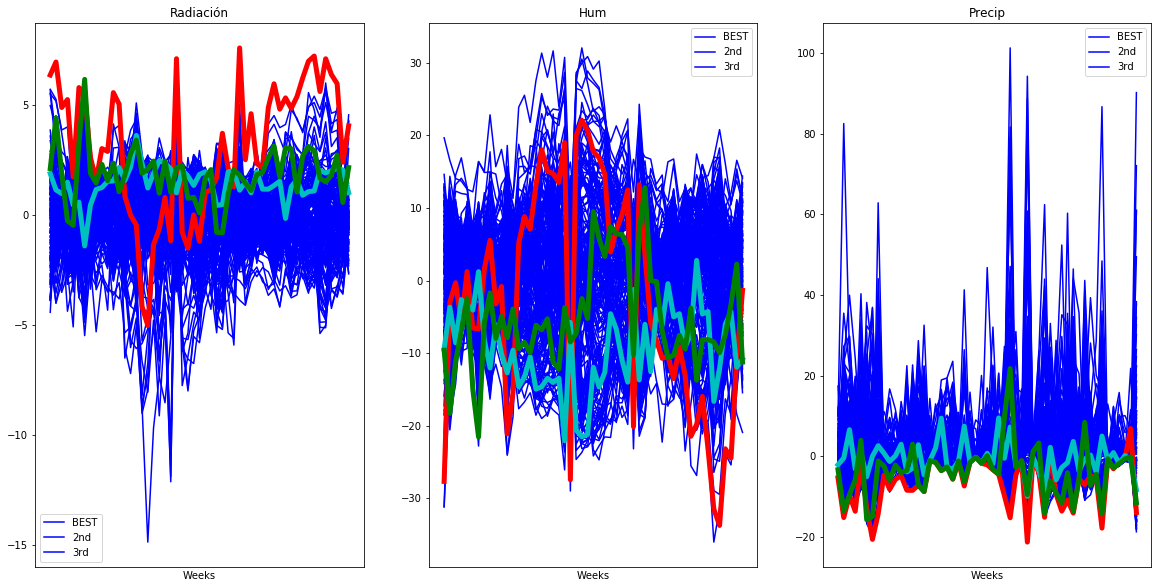

In [19]:
naming = 'Guia de IsoraTenerife'
naming5 = 'HuesaJaen'
naming6 = 'TabernasAlmeria'
#naming1='IznallozGranada'

fig, axes = plt.subplots(1,3, figsize=(20,10))


count = 0
for word in ['Radiación', 'Hum', 'Precip']:
    total = (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1)
    axes[count].plot(total.transpose(), 'b')
    axes[count].plot(total.loc[naming], 'r',linewidth=5)
    axes[count].plot(total.loc[naming5], 'c',linewidth=5)
    axes[count].plot(total.loc[naming6], 'g',linewidth=5)
    
    axes[count].set_title(word)
    axes[count].set_xlabel('Weeks')
    axes[count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
    axes[count].legend(['BEST', '2nd', '3rd'])
    
    count+=1


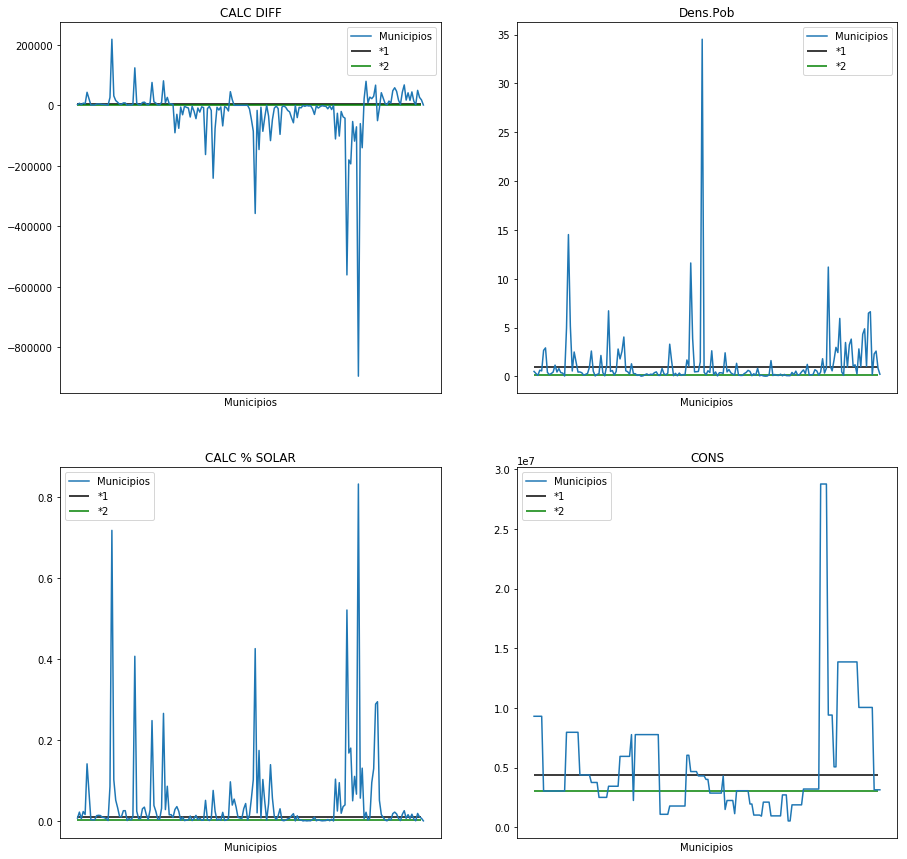

In [20]:
fi, axes = plt.subplots(2,2, figsize=(15,15))


choice1 = 'PadulGranada'
choice2 = 'HuesaJaen'


count = 0
for title in ['CALC DIFF', 'Dens.Pob', 'CALC % SOLAR', 'CONS']:
    if count<2:
        axes[0,count].plot(final_filter[[i for i in final_filter if title in i]])
        axes[0,count].hlines(final_filter.loc[choice1][title], 0,180, 'k')
        axes[0,count].hlines(final_filter.loc[choice2][title], 0,180, 'g')
        axes[0,count].set_title(title)
        axes[0,count].set_xlabel('Municipios')
        axes[0,count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
        axes[0,count].legend(['Municipios', '*1', '*2'])
    else:
        axes[1,count-2].plot(final_filter[[i for i in final_filter if title in i]])
        axes[1,count-2].hlines(final_filter.loc[choice1][title], 0,180, 'k')
        axes[1,count-2].hlines(final_filter.loc[choice2][title], 0,180, 'g')
        axes[1,count-2].set_title(title)
        axes[1,count-2].set_xlabel('Municipios')
        axes[1,count-2].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
        axes[1,count-2].legend(['Municipios', '*1', '*2'])
    
    count+=1
    
plt.show()

# CHOSEN: Huesa, Jaén - LA JOYA DE ESPAÑA

## Finding Index

In [21]:
print(np.where(final_filter.index =='HuesaJaen'))
final_filter.iloc[8]

(array([8], dtype=int64),)


01- Hum Media (%)    6.930000e+01
010 Hum Media (%)    6.757333e+01
011 Hum Media (%)    5.852667e+01
012 Hum Media (%)    6.505000e+01
013 Hum Media (%)    6.145333e+01
                         ...     
CALC Consumo         1.191287e+04
CALC % SOLAR         3.111300e-03
CALC DIFF            9.454689e+02
Dens.Pob             1.798012e-01
CONS                 3.032368e+06
Name: HuesaJaen, Length: 166, dtype: float64

# SCORE GENERATION
- Carried out in two phases:
- (1) Creating a distance variable for weather data; all instances of weather as a "distance" from the chosen best conditions
- (2) Normalizing all other chosen variables and creating the "score equation"

## PHASE 1

### Calculating Weather Similarity

Text(0.5, 1.0, 'Distance Histogram')

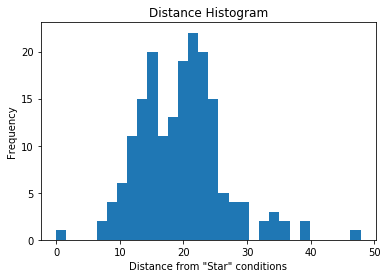

In [22]:
nn = NearestNeighbors(n_neighbors = len(final_filter.dropna(axis=1)))
ss = StandardScaler()

a = final_filter[[i for i in final_filter.columns if 'Radiación' in i]]
b = final_filter[[i for i in final_filter.columns if 'Hum Media' in i]]
c = final_filter[[i for i in final_filter.columns if 'Precip' in i]]

#inp = ss.fit_transform(final_filter[[i for i in final_filter.columns if 'Radiación' in i or 'Hum Media' in i or 'Precip' in i]].dropna(axis=1).reset_index(drop=True))
inp = ss.fit_transform(pd.concat([a,a,b,c], axis=1))
nn.fit(inp)
dist_sol = pd.DataFrame(nn.kneighbors(inp[8].reshape(1,-1))[0][0], columns= ['d_Weather'], index = nn.kneighbors(inp[8].reshape(1,-1))[1][0])

plt.hist(dist_sol.values, bins=30)
plt.xlabel('Distance from "Star" conditions')
plt.ylabel('Frequency')
plt.title('Distance Histogram')

## PHASE 2

### Variable Creation
- Ensuring that all variable has a distribution that is more or less normal/gaussian, so that it doesn't have a greater effect on the scores

In [23]:
inp = final_filter.drop([i for i in final_filter.columns if 'Radiación' in i or 'Hum Media' in i or 'Precip' in i], axis=1)[['CONS', 'CALC % SOLAR', 'CALC DIFF', 'Dens.Pob']].reset_index(drop=True)
inp['logCONS'] = np.log(inp['CONS']) #
inp['logDens.Pob'] = np.log(inp[['Dens.Pob']]) #
inp['SQRT % SOL.'] = np.sqrt(inp['CALC % SOLAR']) #not using
inp['CALC DIFF NEW'] = np.sqrt(218288 - inp['CALC DIFF']) #ok
inp = inp.drop(['CONS', 'CALC % SOLAR', 'Dens.Pob', 'CALC DIFF'], axis=1)

## Compiling all variables into "total"

In [24]:
ss = StandardScaler()
mms = MinMaxScaler()

total = pd.concat([inp.reset_index(drop=True), dist_sol],axis=1)
print(total)

total = ss.fit_transform(total)

       logCONS  logDens.Pob  SQRT % SOL.  CALC DIFF NEW  d_Weather
0    16.045167    -0.672401     0.085433     464.833307  21.361597
1    16.045167    -1.215712     0.148157     460.019214  10.909345
2    16.045167    -2.282813     0.075714     465.344998  15.935023
3    16.045167    -0.454373     0.152735     459.564003  12.418611
4    16.045167    -0.573439     0.126433     461.985242  21.401025
..         ...          ...          ...            ...        ...
177  16.121885    -1.724301     0.022798     465.741001  26.822767
178  14.957224     0.831812     0.136544     411.126341  24.868609
179  14.957224     0.952789     0.099133     438.545047  28.868995
180  14.957224    -0.167966     0.082058     447.768108  23.926383
181  14.957224    -1.506266     0.018755     466.217312  21.978932

[182 rows x 5 columns]


## Calculating and normalizing score values

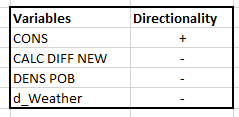

- CHOSEN EQUATION:
###    SCORE = CONS - log(DENS POB) - CALC_DIFF_NEW - 2*d_Weather

Index(['logCONS', 'logDens.Pob', 'SQRT % SOL.', 'CALC DIFF NEW'], dtype='object')


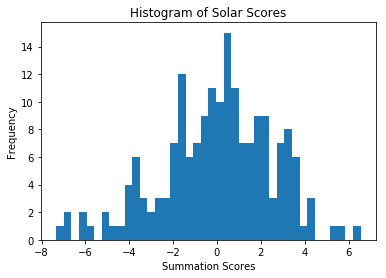

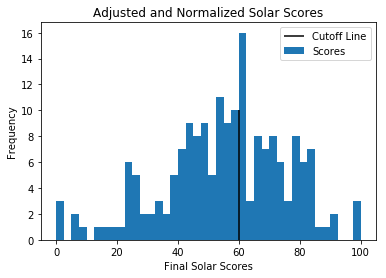

In [25]:
print(inp.columns)

new_score = total[:,0] - total[:,1] - total[:,3] - 2 *total[:,4]

plt.hist(new_score, bins=40)
plt.title('Histogram of Solar Scores')
plt.xlabel('Summation Scores')
plt.ylabel('Frequency')

min_loc = np.argmin(new_score)
max_loc = np.argmax(new_score)

ordering = np.where(np.logical_and(new_score!=np.min(new_score), new_score!=np.max(new_score)))

new_score = mms.fit_transform(new_score[ordering].reshape(-1,1))*100
new_score = pd.DataFrame(new_score, index = list(ordering[0]), columns = ['SCORES_NEW'])
new_score.loc[max_loc] = 100
new_score.loc[min_loc] = 0

plt.figure()
plt.hist(new_score.values, bins=40)
plt.title('Adjusted and Normalized Solar Scores')
plt.xlabel('Final Solar Scores')
plt.ylabel('Frequency')
plt.vlines(60, 0, 10)
plt.legend(['Cutoff Line', 'Scores'])

test_again = pd.concat([final_filter.reset_index(), new_score],axis=1)
test_again_solar = test_again

### PRE-NORMALIZATION SCORES BY SUMMATION

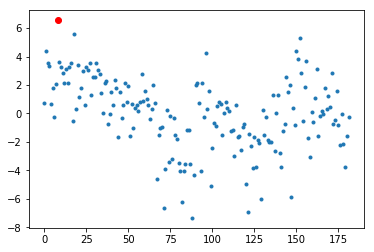

In [26]:
num = 8
plt.plot(total[:,0] - total[:,1] - total[:,3] - 2 *total[:,4],'.')
plt.plot(num, total[num,0] - total[num,1] - total[num,3] - 2 *total[num,4], 'ro')

# VISUALIZE SCORES

In [27]:
from ipywidgets import interact
@interact (n=(0,len(test_again.sort_values(by='SCORES_NEW', ascending=False)['UNIQUE'])))

def viewGraph(n=0):
   
    print(n)
    print(test_again.sort_values(by='SCORES_NEW', ascending=False)['SCORES_NEW'].iloc[n])

    naming = 'HuesaJaen'
    naming1 = test_again.sort_values(by='SCORES_NEW', ascending=False)['UNIQUE'].iloc[n]
    print(naming1)

    fig, axes = plt.subplots(1,3, figsize=(20,10))


    count = 0
    for word in ['Radiación', 'Hum', 'Precip']:
        total = (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1)
        axes[count].plot(total.transpose(), 'b')
        axes[count].plot(total.loc[naming], 'r',linewidth=5)
        axes[count].plot(total.loc[naming1], 'g',linewidth=5)
        axes[count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
        axes[count].set_title(word)
        axes[count].legend(['BEST', '2nd', '3rd'])

        count+=1
        
    
    fi, axes = plt.subplots(2,2, figsize=(15,15))
    
    choice1 = naming
    choice2 = naming1

    count = 0
    for title in ['CALC DIFF', 'Dens.Pob', 'CALC % SOLAR', 'CONS']:
        #ax = final_filter[[i for i in final_filter if title in i]].plot(legend=False)
        if count<2:
            axes[0,count].plot(final_filter[[i for i in final_filter if title in i]])
            axes[0,count].hlines(final_filter.loc[choice1][title], 0,180, 'k')
            axes[0,count].hlines(final_filter.loc[choice2][title], 0,180, 'g')
            axes[0,count].set_title(title)
            axes[0,count].set_xlabel('Municipios')
            axes[0,count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
            axes[0,count].legend(['Municipios', '*1', '*2'])
        else:
            axes[1,count-2].plot(final_filter[[i for i in final_filter if title in i]])
            axes[1,count-2].hlines(final_filter.loc[choice1][title], 0,180, 'k')
            axes[1,count-2].hlines(final_filter.loc[choice2][title], 0,180, 'g')
            axes[1,count-2].set_title(title)
            axes[1,count-2].set_xlabel('Municipios')
            axes[1,count-2].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
            axes[1,count-2].legend(['Municipios', '*1', '*2'])

        count+=1


interactive(children=(IntSlider(value=0, description='n', max=182), Output()), _dom_classes=('widget-interact'…

# FINAL FUNCTION
- Calculating score for location, based on nearest available data within a given (or user-provided) radius

In [28]:
test_again_wind = pd.read_excel('final_data_wind_v2.xls').drop(['Unnamed: 0'], axis=1)
test_again_wind = test_again_wind[test_again_wind['UNIQUE']!='LibrillaMurcia']
len(test_again_wind)

182

In [29]:
test_again[test_again['UNIQUE']=='HuesaJaen']

,UNIQUE,01- Hum Media (%),010 Hum Media (%),011 Hum Media (%),012 Hum Media (%),013 Hum Media (%),014 Hum Media (%),015 Hum Media (%),016 Hum Media (%),017 Hum Media (%),...,08- Radiación (MJ/m2),09- Radiación (MJ/m2),LONGITUD_ETRS89,LATITUD_ETRS89,CALC Consumo,CALC % SOLAR,CALC DIFF,Dens.Pob,CONS,SCORES_NEW
8,HuesaJaen,69.3,67.573333,58.526667,65.05,61.453333,67.725,72.155,57.8,48.75875,...,16.206667,14.463333,-3.075197,37.765566,11912.868332,0.003111,945.468907,0.179801,3.032368e+06,100.0


In [30]:
def which_energy(solar, wind):
    score = 0
    if solar>=60:
        print('SOLAR ENERGY IS SUITABLE')
        score = 1
    if  wind>=60:
        print('WIND ENERGY IS SUITABLE') 
        score = 1
        
    if score==0:
        print('NEITHER WIND NOR SOLAR ENERGY IS SUITABLE')          

In [31]:
def inp_point(radius = 1 ):
    
    print('INPUT DATA BELOW')
    print(' ')
    lat = float(input('LATITUDE: '))
    long = float(input('LONGITUDE: '))
    
    rad = input('RADIUS (optional): ')
    if rad:
        radius = float(rad)
    
    print(' ')
    print('####################')
    nn = NearestNeighbors(radius = radius, p=2)
    
    nn.fit(test_again[['LATITUD_ETRS89', 'LONGITUD_ETRS89']].astype(float))
    original = nn.radius_neighbors(np.array([lat,long]).reshape(1,-1))
    
    try:
        
        closest = test_again.iloc[original[1][0][np.argmin(original[0][0])]]['UNIQUE']
        score_solar = test_again.iloc[original[1][0][np.argmin(original[0][0])]]['SCORES_NEW']
        score_wind = test_again_wind.iloc[original[1][0][np.argmin(original[0][0])]]['SCORES_NEW']
        
        print(' ')
        print('CLOSEST DATA from: ' + closest)
        print(' ')
        print('SOLAR SCORE: ' + str(round(score_solar,0)))
        print('WIND SCORE: ' + str(round(score_wind,0)))
        print(' ')
        which_energy(score_solar, score_wind)
        return closest
    
    except ValueError:
        print('No data available in this radius')
       
    
    
original = inp_point()  

INPUT DATA BELOW
 
LATITUDE: 37
LONGITUDE: -1.3
RADIUS (optional): 
 
####################
 
CLOSEST DATA from: Huercal-OveraAlmeria
 
SOLAR SCORE: 60.0
WIND SCORE: 48.0
 
SOLAR ENERGY IS SUITABLE


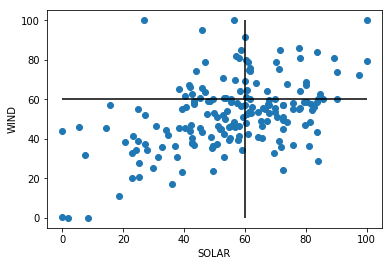

BOTH: 17.58%
SOLAR: 25.82%
WIND: 12.09%
RENEWABLE TOTAL: 55.489999999999995%


In [32]:
plt.scatter(test_again['SCORES_NEW'], test_again_wind['SCORES_NEW'])
plt.xlabel('SOLAR')
plt.ylabel('WIND')
plt.hlines(60,0,100)
plt.vlines(60,0,100)
plt.show()

work = test_again.merge(test_again_wind, on = 'UNIQUE')[['SCORES_NEW_x', 'SCORES_NEW_y']]
a = round(len(work[np.logical_and(work['SCORES_NEW_x']>=60, work['SCORES_NEW_y']>=60)])/len(work)*100,2)
b = round(len(work[np.logical_and(work['SCORES_NEW_x']>=60, work['SCORES_NEW_y']<60)])/len(work)*100,2)
c = round(len(work[np.logical_and(work['SCORES_NEW_x']<60, work['SCORES_NEW_y']>=60)])/len(work)*100,2)
d = a + b + c 
print('BOTH: ' + str(a)+ '%')
print('SOLAR: ' + str(b)+ '%')
print('WIND: ' + str(c)+ '%')
print('RENEWABLE TOTAL: ' + str(d)+ '%')
      




In [33]:
len(test_again[test_again['SCORES_NEW']>=60])/len(test_again)

0.4340659340659341

In [34]:
testing_plz = test_again
save_index_good = testing_plz[testing_plz['SCORES_NEW']>=60].index.values
save_index_bad = testing_plz[testing_plz['SCORES_NEW']<60].index.values
good = pd.DataFrame(np.ones(len(save_index_good)), index= list(save_index_good), columns = ['Y_N'])
bad = pd.DataFrame(np.zeros(len(save_index_bad)), index= list(save_index_bad), columns = ['Y_N'])
test_again=pd.concat([test_again, pd.concat([good,bad], axis=0)], axis=1)

In [35]:
test_again

,UNIQUE,01- Hum Media (%),010 Hum Media (%),011 Hum Media (%),012 Hum Media (%),013 Hum Media (%),014 Hum Media (%),015 Hum Media (%),016 Hum Media (%),017 Hum Media (%),...,09- Radiación (MJ/m2),LONGITUD_ETRS89,LATITUD_ETRS89,CALC Consumo,CALC % SOLAR,CALC DIFF,Dens.Pob,CONS,SCORES_NEW,Y_N
0,Isla MayorSevilla,85.700000,81.336667,73.890000,69.246667,68.276667,78.605000,77.005,70.280000,75.763000,...,13.623333,-6.162849,37.133844,27946.660583,0.007299,2217.996363,0.510481,9.296675e+06,61.193327,1.0
1,OsunaSevilla,78.020000,75.696667,66.050000,68.523333,65.456667,73.770000,74.705,61.450000,51.508750,...,13.500000,-5.101206,37.237571,84045.788634,0.021950,6670.323023,0.296499,9.296675e+06,90.242925,1.0
2,AznalcazarSevilla,83.580000,81.336667,73.200000,71.543333,72.166667,79.450000,77.600,73.680000,64.565250,...,13.566667,-6.252362,37.304734,21949.543660,0.005733,1742.033108,0.101997,9.296675e+06,83.749110,1.0
3,Lora del RioSevilla,83.373333,77.986667,71.613333,64.640000,64.053333,72.560000,76.045,64.030000,57.863250,...,13.356667,-5.530359,37.653334,89320.188353,0.023328,7088.927577,0.634846,9.296675e+06,82.166664,1.0
4,GuillenaSevilla,81.096667,77.526667,69.040000,65.383333,64.343333,75.350000,75.690,67.830000,54.783000,...,11.256667,-6.052323,37.539397,61206.010538,0.015985,4857.636151,0.563584,9.296675e+06,60.800342,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,PlanesAlicante,70.496667,50.680000,54.160000,69.820000,65.870000,72.180000,55.390,68.480000,63.523000,...,13.520000,-0.344785,38.785834,3742.602957,0.000520,1373.319530,0.178298,1.003797e+07,54.760811,0.0
178,OndaCastellon,60.863333,51.683333,57.826667,58.043333,58.680000,66.180000,54.165,64.066667,62.665000,...,13.016667,-0.263164,39.964207,134253.054690,0.018644,49263.131599,2.297479,3.132132e+06,38.250986,0.0
179,NulesCastellon,70.076667,58.646667,65.480000,62.336667,63.973333,71.170000,58.145,70.240000,68.350250,...,11.620000,-0.154732,39.853121,70763.818963,0.009827,25966.242139,2.592932,3.132132e+06,25.110878,0.0
180,SegorbeCastellon,69.760000,56.103333,57.983333,64.000000,61.226667,70.536667,56.105,67.013333,64.833000,...,12.800000,-0.488080,39.852366,48486.420411,0.006734,17791.721127,0.845383,3.132132e+06,42.763967,0.0


In [36]:
import plotly.express as px
@interact(color = ['SCORES_NEW', 'Y_N'])
def view_map(color='SCORES_NEW'):
    view = px.scatter(test_again, x='LONGITUD_ETRS89', y='LATITUD_ETRS89', color = color, hover_data = ['UNIQUE'])
    view.show()

interactive(children=(Dropdown(description='color', options=('SCORES_NEW', 'Y_N'), value='SCORES_NEW'), Output…